# 泰坦尼克号数据分析——hawli

## 第一部分：数据整理

### 处理缺失值

In [1]:
import pandas as pd

In [11]:
import numpy as np

In [82]:
import matplotlib.pyplot as plt

In [86]:
%matplotlib inline

In [4]:
# 导入原始文件
titanic_data = pd.read_csv('file:///Users/lihan/Downloads/titanic-data.csv')

In [5]:
# 查看文件信息
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
# 查看每个变量的总缺失值数量
titanic_data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
# 用年龄的均值填充缺失值
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [45]:
# 由于cabin缺失值较多，而且该项对后期问题分析没有影响，故去除
titanic_data.drop('Cabin',axis=1,inplace=True)

In [52]:
# 进港地点缺失值较少，不影响探索，因此去除两行缺失值
titanic_data.dropna(axis=0, how='any',inplace=True)

In [53]:
# 查看整理后的数据分布,确认数据量
titanic_data.shape

(889, 11)

### 处理并合并变量

In [58]:
# 处理变量sex，把性别的变量用数值代替，男为1，女为0
titanic_data['sex_male'] = titanic_data.Sex.map({'female':0,'male':1})

In [59]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [63]:
# 处理变量Embarked,用数值代替
embarked_dummies = pd.get_dummies(titanic_data.Embarked,prefix='Embarked').iloc[:,1:]

In [64]:
# 合并变量进数据框架
titanic_data = pd.concat([titanic_data,embarked_dummies],axis=1)

In [73]:
# 把乘客信息设为索引
titanic_data.set_index('PassengerId',inplace=True)

In [75]:
# 去除乘客行，查看整理后数据
titanic_data.index.name = None
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_male,Embarked_Q,Embarked_S
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


## 第二部分 问题提出及分析
### 1.泰坦尼克号生存事件的相关描述信息

In [342]:
# 查看数据描述信息
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_male,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [348]:
# titanic的幸存人数
titanic_data['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

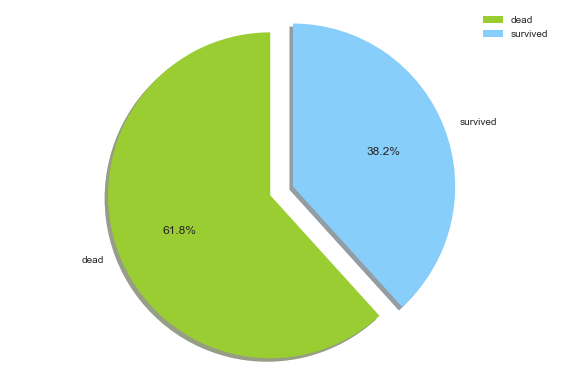

In [350]:
plt.pie(
    (549,340),
    labels=('dead','survived'),
    shadow=True,
    colors=('yellowgreen', 'lightskyblue'),
    explode=(0,0.15), # space between slices 
    startangle=90,    # rotate conter-clockwise by 90 degrees
    autopct='%1.1f%%',# display fraction as percentage
    )
plt.legend(fancybox=True)
plt.axis('equal')     # plot pyplot as circle
plt.tight_layout()
plt.show()

In [90]:
# titanic船票类型统计
titanic_data['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [343]:
# titanic登船地点统计
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [101]:
# titanic 男女比例
titanic_data.Sex.value_counts(normalize=True)

male      0.649044
female    0.350956
Name: Sex, dtype: float64

根据以上分析，我们对于泰坦尼克登船人员的相关信息有以下了解：

1.titanic有三个登船地点Southampton，Cherbourg，Queenstown的人数分别为644，168，77，Southampton登船人数最多

2.titanic分为三种船票，分别为一等舱、二等舱、三等舱，购买三等舱的人数最多，购买二等舱人数最少

3.titanic登船人员男性比女性多，分别为65%和35%

4.本事件幸存率为38.2%

### 2.年龄与生存的关系

In [106]:
# titanic 幸存状态分布
dead = titanic_data[titanic_data.Survived == 0]
survived = titanic_data[titanic_data.Survived == 1]

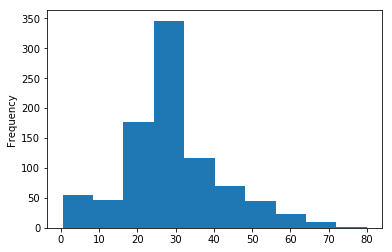

In [126]:
# 整艘船人员年龄分布图
titanic_data['Age'].plot(kind='hist')

由此图可以看出：登船人员集中在20～30岁左右，老人与小孩人数较少。

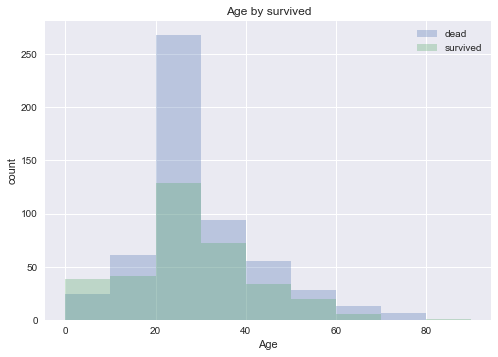

In [336]:
# 年龄段死亡人数对比
data1 = dead.Age 
data2 = survived.Age 
bins = np.arange(0, 100, 10)

plt.hist(data1, bins=bins, alpha=0.3, label='dead')
plt.hist(data2, bins=bins, alpha=0.3, label='survived')
plt.title('Age by survived')
plt.xlabel('Age')
plt.ylabel('count')
plt.legend(loc='upper right')


plt.show()

由此图可以看出，死者、幸存者在年龄分布上与总体分布相似，但70岁以上老人无人生还，20～30岁的青年死亡占比最大。

In [146]:
# 年龄与存活的相关
titanic_data.Survived.corr(titanic_data.Age)

-0.074672923789818726

由相关分析得知，年龄与存活的相关关系比较弱，基本上没有太大的关系。

### 3.性别与生存的关系

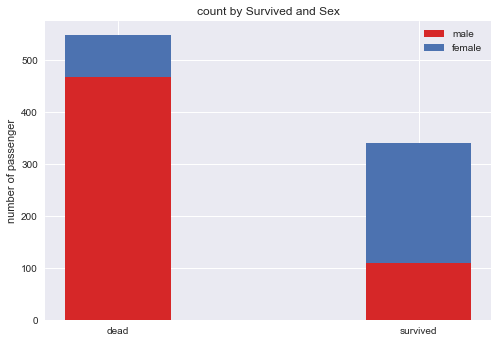

In [191]:
# 性别与生存率的对比

N = 2
male = (468, 109)
female = (81,231)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, male, width, color='#d62728')
p2 = plt.bar(ind, female, width,bottom=male)

plt.ylabel('number of passenger')
plt.title('count by Survived and Sex')
plt.xticks(ind, ('dead', 'survived'))
plt.yticks(np.arange(0, 600, 100))
plt.legend((p1[0], p2[0]), ('male', 'female'))

plt.show()

In [150]:
# 性别与存活的相关
titanic_data.sex_male.corr(titanic_data.Survived)

-0.54158491555116894

由以上对比图可以看出，男性在死亡人数中的占比较大，只有少数生还，而女性基本存活下来，只有少数死亡，性别与死亡相关较高，为0.54。

### 4.船票类型与生存的关系

In [214]:
# 死亡人员船票类型统计
dead['Pclass'].value_counts()

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [108]:
# 存活人员船票类型统计
survived['Pclass'].value_counts()

1    134
3    119
2     87
Name: Pclass, dtype: int64

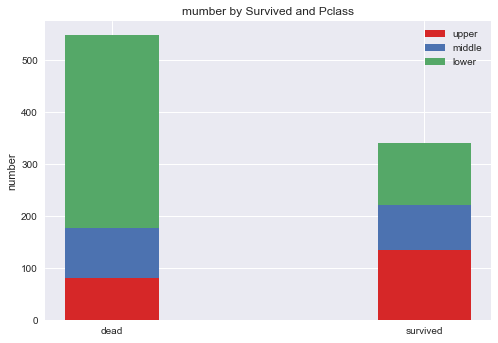

In [260]:
# 不同仓位乘客生存率对比
N = 2
upper = (80, 134)
middle = (97,87)
lower = (372,119)
ind = np.arange(N)    # the x locations for the groups
width = 0.3       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, upper, width, color='#d62728')
p2 = plt.bar(ind, middle, width,bottom=upper)
p3 = plt.bar(ind, lower, width,bottom=np.add(upper,middle))

plt.ylabel('number')
plt.title('mumber by Survived and Pclass')
plt.xticks(ind, ('dead', 'survived'))
plt.yticks(np.arange(0, 600, 100))
plt.legend((p1[0], p2[0], p3[0]), ('upper', 'middle','lower'))

plt.show()

In [151]:
# 船票类型与存活的相关
titanic_data.Pclass.corr(titanic_data.Survived)

-0.33554885935682532

由上图可以看出，死亡人数中，大部分购买的是低等舱，头等舱的死亡人数较少，而幸存者中头等舱比例较大，创票等级与死亡负相关，为0.34。

In [337]:
# titanic 票型分析
first =titanic_data[titanic_data.Pclass == 1]
second =titanic_data[titanic_data.Pclass == 2]
third =titanic_data[titanic_data.Pclass == 3]

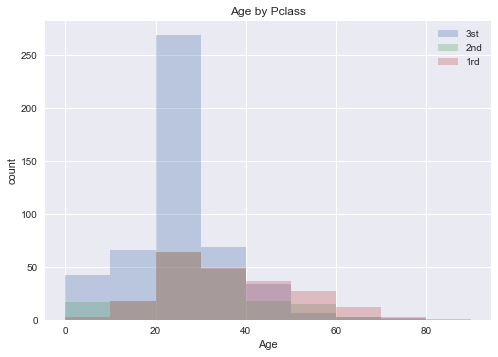

In [339]:
data1 = first.Age 
data2 = second.Age
data3 = third.Age
bins = np.arange(0, 100, 10)

plt.hist(data3, bins=bins, alpha=0.3, label='3st')
plt.hist(data2, bins=bins, alpha=0.3, label='2nd')
plt.hist(data1, bins=bins, alpha=0.3, label='1rd')
plt.title('Age by Pclass')
plt.xlabel('Age')
plt.ylabel('count')
plt.legend(loc='upper right')


plt.show()

In [351]:
# 船票类型与年龄的相关
titanic_data.Pclass.corr(titanic_data.Age)

-0.32795369920550954

由于我们发现20～30岁的青年人死亡比例较大，但是年龄跟存活率相关性不大，我们分析一下年龄与船票的关系，发现20～30岁的青年购买低等舱的比例最大，很有可能是受船票影响。

### 第三部分 结论及展望

由以上分析我们可以看出不同因素对生存的影响。
- 首先，年龄与生存关系不大，但70岁老年人死亡率较高，而20～30岁年轻人死亡率较高，可能是由于买了低价船票。
- 其次，性别与生存关系较大，男性死亡率较高，可能是因为出于对女性的保护，女士优先逃脱。
- 再次，船票与生存关系较大，不同的等级仓位在安全设置可能不同，可以进行后续的研究，看看之间的关系，也有可能买得起头等舱的人具有特别的求生方式。

另外，以上分析具有以下限制：
1.以上结论均为相关研究，不代表因果关系
2.均为描述数据，非实验研究结果，没有进行变量控制
3.均为对比分析，并未进行显著性差异检验，不具备较强的解释力

参考资料如下：

1.[饼图及直方图](https://github.com/Hawli777/matplotlib-gallery/blob/master/ipynb/specialplots.ipynb)

2.[柱状图](https://matplotlib.org/examples/pylab_examples/bar_stacked.html)

3.[matplotlib](https://matplotlib.org/api/index.html)

4.[pandas参考](http://www.bilibili.com/av6785636)